In [ ]:
import yfinance as yf
import numpy as np
import pandas as pd

# Especifique o símbolo da empresa que você vai trabalhar
# Configure data de início e fim da sua base
# NVIDIA - NVDA
symbol = 'NVDA'
start_date = '2020-01-01'
end_date = '2025-06-04'

# Use a função download para obter os dados
df = yf.download(symbol, start=start_date, end=end_date)


print("Primeiras linhas dos dados:")
print(df.head())
print("\nInformações do DataFrame:")
df.info()
print(f"\nDimensões do DataFrame: {df.shape}")


YF.download() has changed argument auto_adjust default to True


[*********************100%***********************]  1 of 1 completed

Primeiras linhas dos dados:
Price          Close      High       Low      Open     Volume
Ticker          NVDA      NVDA      NVDA      NVDA       NVDA
Date                                                         
2020-01-02  5.972160  5.972160  5.892751  5.943284  237536000
2020-01-03  5.876570  5.920383  5.827530  5.852424  205384000
2020-01-06  5.901215  5.906442  5.757083  5.783220  262636000
2020-01-07  5.972659  6.018463  5.884537  5.929594  314856000
2020-01-08  5.983861  6.025184  5.928349  5.968428  277108000

Informações do DataFrame:
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1362 entries, 2020-01-02 to 2025-06-03
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   (Close, NVDA)   1362 non-null   float64
 1   (High, NVDA)    1362 non-null   float64
 2   (Low, NVDA)     1362 non-null   float64
 3   (Open, NVDA)    1362 non-null   float64
 4   (Volume, NVDA)  1362 non-null   int64  
dtypes: fl

In [ ]:
# Quantidade de valores nulos por coluna
print(df.isnull().sum())

Price   Ticker
Close   NVDA      0
High    NVDA      0
Low     NVDA      0
Open    NVDA      0
Volume  NVDA      0
dtype: int64


In [ ]:
# Linhas onde existe ao menos um NaN
df[df.isnull().any(axis=1)]

Price,Close,High,Low,Open,Volume
Ticker,NVDA,NVDA,NVDA,NVDA,NVDA
Date,,,,,


In [ ]:
# Descrição estatística para cada coluna numérica
print(df.describe())

Price         Close         High          Low         Open        Volume
Ticker         NVDA         NVDA         NVDA         NVDA          NVDA
count   1362.000000  1362.000000  1362.000000  1362.000000  1.362000e+03
mean      44.883770    45.732381    43.949434    44.883563  4.338874e+08
std       43.192785    44.022977    42.304716    43.246928  1.884417e+08
min        4.891978     5.229233     4.500419     4.984136  9.788400e+07
25%       13.919232    14.162361    13.680758    13.951237  2.921530e+08
50%       22.707749    23.058384    22.220029    22.646967  4.086580e+08
75%       60.718700    61.396947    59.698582    60.217638  5.364410e+08
max      149.416245   153.115916   147.806407   153.015919  1.543911e+09


In [ ]:
close = df['Close']

min_valor = close.min()
max_valor = close.max()
data_min = close.idxmin()   # data em que houve o menor fechamento
data_max = close.idxmax()   # data em que houve o maior fechamento

print(f"Menor fechamento: {min_valor.iloc[0]:.2f} USD em {data_min.iloc[0].date()}")
print(f"Maior fechamento: {max_valor.iloc[0]:.2f} USD em {data_max.iloc[0].date()}")

Menor fechamento: 4.89 USD em 2020-03-16
Maior fechamento: 149.42 USD em 2025-01-06


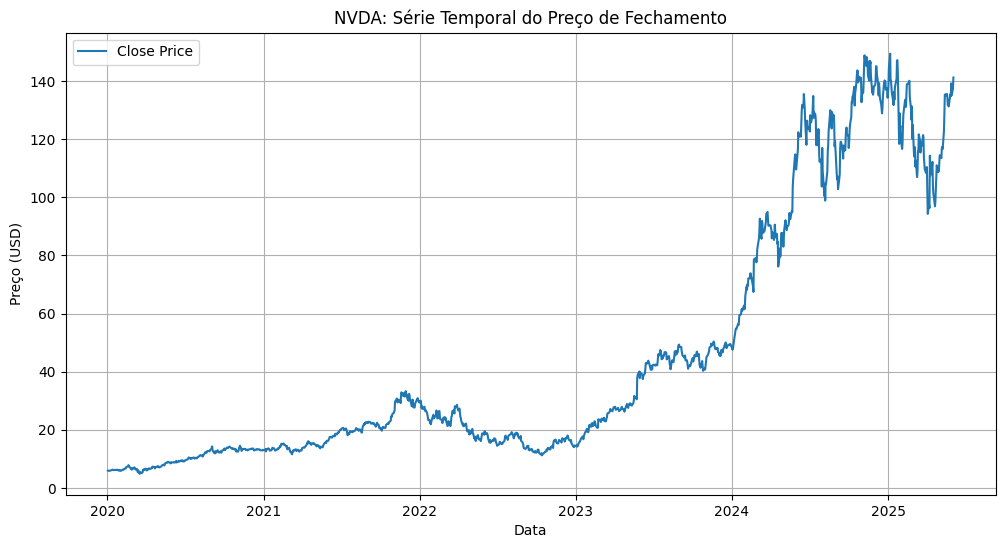

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.plot(df.index, df['Close'], label='Close Price')
plt.title(f'{symbol}: Série Temporal do Preço de Fechamento')
plt.xlabel('Data')
plt.ylabel('Preço (USD)')
plt.legend()
plt.grid(True)
plt.show()

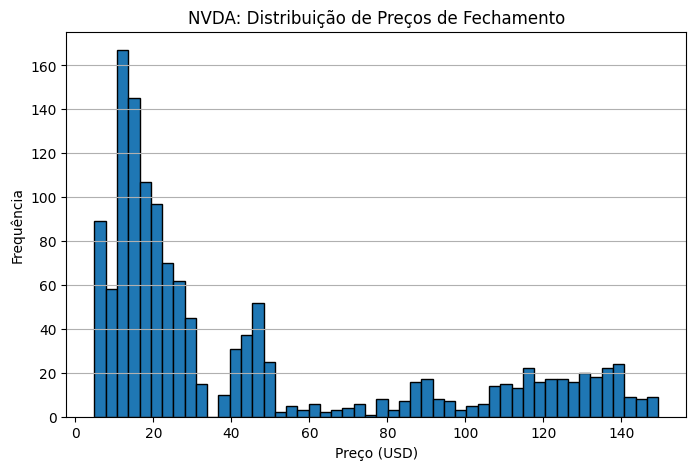

In [ ]:
plt.figure(figsize=(8, 5))
plt.hist(df['Close'], bins=50, edgecolor='black')
plt.title(f'{symbol}: Distribuição de Preços de Fechamento')
plt.xlabel('Preço (USD)')
plt.ylabel('Frequência')
plt.grid(axis='y')
plt.show()

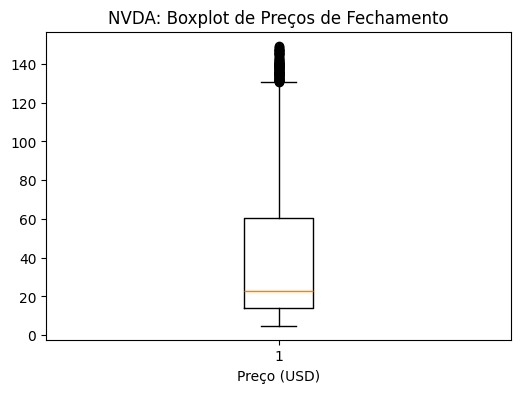

In [ ]:
plt.figure(figsize=(6, 4))
plt.boxplot(df['Close'], vert=True)
plt.title(f'{symbol}: Boxplot de Preços de Fechamento')
plt.xlabel('Preço (USD)')
plt.show()

In [ ]:
df.to_csv('NVDA_2020_2025.csv')


In [ ]:
df.head()

Price,Close,High,Low,Open,Volume
Ticker,NVDA,NVDA,NVDA,NVDA,NVDA
Date,,,,,
2020-01-02,5.972160,5.972160,5.892751,5.943284,237536000
2020-01-03,5.876570,5.920383,5.827530,5.852424,205384000
2020-01-06,5.901215,5.906442,5.757083,5.783220,262636000
2020-01-07,5.972659,6.018463,5.884537,5.929594,314856000
2020-01-08,5.983861,6.025184,5.928349,5.968428,277108000


In [ ]:
df = df[['Close']].copy()  # coluna 'Close'

In [ ]:
from sklearn.preprocessing import MinMaxScaler
import numpy as np
import joblib

# Converte a coluna 'Close' para array 2D
close_values = df['Close'].values.reshape(-1, 1)

# Cria e ajusta o scaler
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_close = scaler.fit_transform(close_values)

# Salva o scaler
joblib.dump(scaler, 'scaler.pkl')

['scaler.pkl']

In [ ]:
sequence_length = 30  # número de dias de histórico usados para predizer o próximo dia

X = []
y = []

for i in range(sequence_length, len(scaled_close)):
    X.append(scaled_close[i - sequence_length:i, 0])
    y.append(scaled_close[i, 0])

X, y = np.array(X), np.array(y)

# LSTM do Keras espera shape = (n_amostras, timesteps, features)
X = X.reshape((X.shape[0], X.shape[1], 1))  # features = 1 (apenas o preço)

In [ ]:
train_size = int(0.8 * X.shape[0])
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

print("Tamanho X_train:", X_train.shape)
print("Tamanho X_test:", X_test.shape)

Tamanho X_train: (1065, 30, 1)
Tamanho X_test: (267, 30, 1)


In [ ]:
import tensorflow as tf
LSTM = tf.keras.layers.LSTM
Dense = tf.keras.layers.Dense
Dropout = tf.keras.layers.Dropout
Input = tf.keras.layers.Input
Model = tf.keras.models.Model

# Construindo o modelo sem passar input_shape direto nos layers LSTM
inputs = Input(shape=(sequence_length, 1))  # 1 feature: preço de fechamento

# Primeira camada LSTM
x = LSTM(units=50, return_sequences=True)(inputs)
x = Dropout(0.2)(x)

# Segunda camada LSTM (não retorna sequências)
x = LSTM(units=50, return_sequences=False)(x)
x = Dropout(0.2)(x)

# Camada densa de saída
outputs = Dense(units=1)(x)  # previsão do preço

# Monta o modelo
model = Model(inputs=inputs, outputs=outputs)

# Compila com Adam e MSE
model.compile(optimizer='adam', loss='mean_squared_error')

# Exibe o sumário do modelo
model.summary()


Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 30, 1)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm (LSTM)                     │ (None, 30, 50)         │        10,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 30, 50)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ (None, 50)             │        20,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 50)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1)              │            51 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 30,651 (119.73 KB)

 Trainable params: 30,651 (119.73 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
# Ajuste de hiperparâmetros
epochs = 50
batch_size = 32

history = model.fit(
    X_train, y_train,
    epochs=epochs,
    batch_size=batch_size,
    validation_split=0.1,
    verbose=1
)

Epoch 1/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 5s 62ms/step - loss: 0.0073 - val_loss: 0.0017
Epoch 2/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 35ms/step - loss: 6.7427e-04 - val_loss: 0.0013
Epoch 3/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 31ms/step - loss: 3.7300e-04 - val_loss: 0.0013
Epoch 4/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 31ms/step - loss: 3.4564e-04 - val_loss: 0.0026
Epoch 5/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - loss: 2.9716e-04 - val_loss: 0.0012
Epoch 6/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step - loss: 2.9818e-04 - val_loss: 0.0010
Epoch 7/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 31ms/step - loss: 3.1552e-04 - val_loss: 0.0016
Epoch 8/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 31ms/step - loss: 2.5469e-04 - val_loss: 8.8533e-04
Epoch 9/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step - loss: 3.5633e-04 - val_loss: 9.4530e-04
Epoch 10/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step - loss: 2.2633e-04 - val_loss: 8.7419e-04
Epoch 11/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 45ms/step - loss: 2.3423e-04 - val_loss: 9.5068e-04
Epoch 1

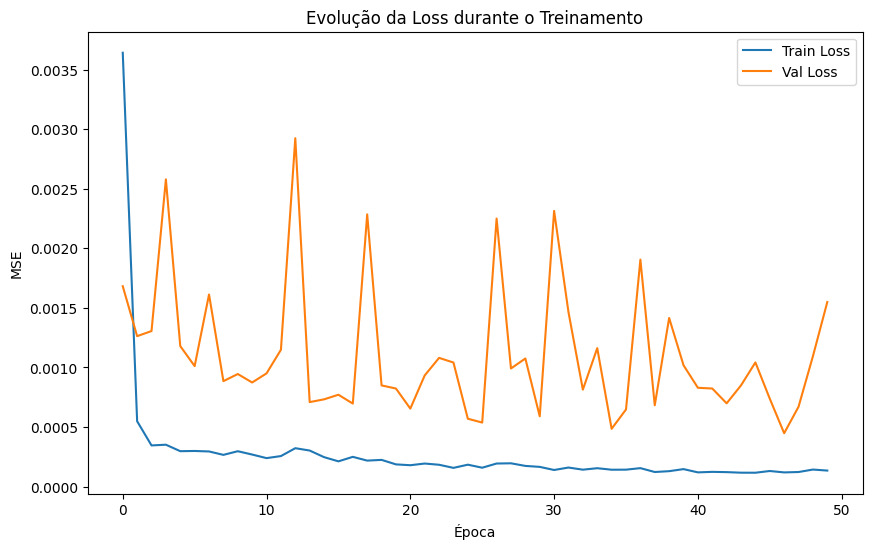

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.title('Evolução da Loss durante o Treinamento')
plt.xlabel('Época')
plt.ylabel('MSE')
plt.legend()
plt.show()

In [ ]:

predicted = model.predict(X_test)  # retorna valores escalonados


predicted_prices = scaler.inverse_transform(predicted.reshape(-1, 1))
real_prices = scaler.inverse_transform(y_test.reshape(-1, 1))


from sklearn.metrics import mean_squared_error, mean_absolute_error
import numpy as np

rmse = np.sqrt(mean_squared_error(real_prices, predicted_prices))
print(f'RMSE no conjunto de teste: {rmse:.2f}')

9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
RMSE no conjunto de teste: 9.82


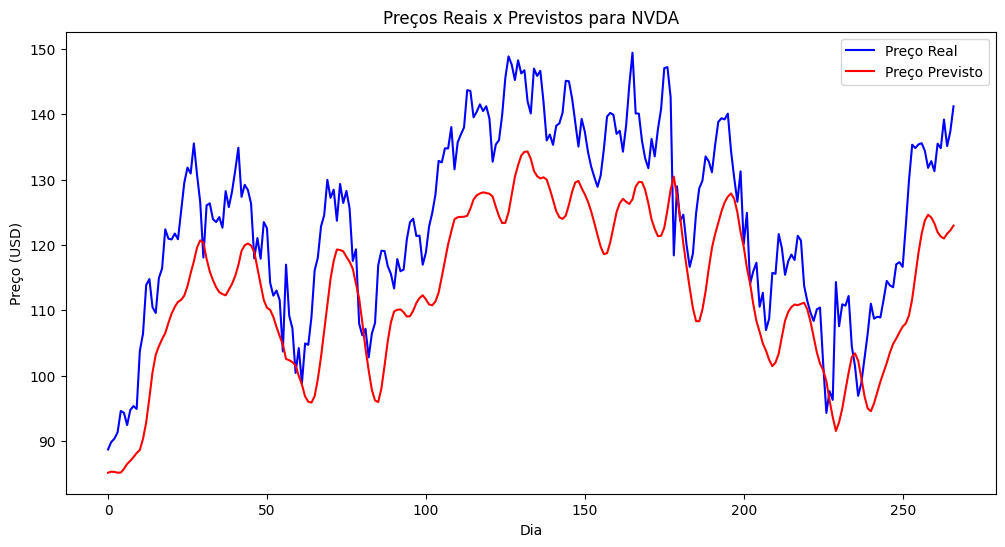

In [ ]:
plt.figure(figsize=(12, 6))
plt.plot(real_prices, color='blue', label='Preço Real')
plt.plot(predicted_prices, color='red', label='Preço Previsto')
plt.title(f'Preços Reais x Previstos para {symbol}')
plt.xlabel('Dia')
plt.ylabel('Preço (USD)')
plt.legend()
plt.show()

In [ ]:
model.save('model.keras')


In [ ]:

def build_lstm_model(
    sequence_length,
    units_lstm=50,
    dropout_rate=0.2,
    n_layers=2,
    learning_rate=0.001
):
    """
    Cria e retorna um modelo de LSTM usando API funcional, sem passar input_shape diretamente nos layers.

    Parâmetros:
    - sequence_length: número de timesteps (ex.: 60)
    - units_lstm: número de neurônios em cada camada LSTM
    - dropout_rate: taxa de dropout
    - n_layers: número de camadas LSTM empilhadas (>=1)
    - learning_rate: learning rate para o otimizador Adam
    """

    inputs = Input(shape=(sequence_length, 1))  # uma feature (preço de fechamento)

    x = inputs

    if n_layers == 1:
        x = LSTM(units=units_lstm)(x)
        x = Dropout(dropout_rate)(x)
    else:
        # Primeira camada LSTM com return_sequences=True
        x = LSTM(units=units_lstm, return_sequences=True)(x)
        x = Dropout(dropout_rate)(x)
        # Camadas intermediárias (se houver)
        for _ in range(n_layers - 2):
            x = LSTM(units=units_lstm, return_sequences=True)(x)
            x = Dropout(dropout_rate)(x)
        # Última camada LSTM
        x = LSTM(units=units_lstm, return_sequences=False)(x)
        x = Dropout(dropout_rate)(x)


    outputs = Dense(units=1, activation='linear')(x)


    model = Model(inputs=inputs, outputs=outputs)


    optimizer = tf.keras.optimizers.Adam(learning_rate=learning_rate)
    model.compile(optimizer=optimizer, loss='mean_squared_error')

    return model

# Exemplo de uso:
# model = build_lstm_model(sequence_length=60, units_lstm=50, dropout_rate=0.2, n_layers=2, learning_rate=0.001)
# model.summary()

In [ ]:
param_grid = {
    'units_lstm':    [30, 50, 80],
    'dropout_rate':  [0.1, 0.2, 0.3],
    'n_layers':      [1, 2],
    'batch_size':    [16, 32],
    'learning_rate': [0.001, 0.0005],
    'epochs':        [30]  #  cuidado com tempo de treino
}


In [ ]:
# Cria lista de todas as combinações (produto cartesiano)
import itertools
all_combinations = list(itertools.product(
    param_grid['units_lstm'],
    param_grid['dropout_rate'],
    param_grid['n_layers'],
    param_grid['batch_size'],
    param_grid['learning_rate'],
    param_grid['epochs']
))

print(f"Total de combinações a testar: {len(all_combinations)}\n")

results = []

for idx, (units, drop, n_l, bs, lr, ep) in enumerate(all_combinations, start=1):
    print(f"=== Expt {idx}/{len(all_combinations)}: "
          f"units={units}, dropout={drop}, layers={n_l}, batch={bs}, lr={lr}, epochs={ep} ===")


    model = build_lstm_model(
        sequence_length=sequence_length,
        units_lstm=units,
        dropout_rate=drop,
        n_layers=n_l,
        learning_rate=lr
    )


    history = model.fit(
        X_train, y_train,
        epochs=ep,
        batch_size=bs,
        validation_split=0.1,
        verbose=0  # 0 para não poluir o console; mude para 1 se quiser acompanhar
    )


    pred_scaled = model.predict(X_test, verbose=0)
    pred_prices = scaler.inverse_transform(pred_scaled)
    real_prices = scaler.inverse_transform(y_test.reshape(-1, 1))

    rmse_test = np.sqrt(mean_squared_error(real_prices, pred_prices))


    results.append({
        'units_lstm':   units,
        'dropout':      drop,
        'n_layers':     n_l,
        'batch_size':   bs,
        'learning_rate':lr,
        'epochs':       ep,
        'rmse_test':    rmse_test,
        'val_loss_last': history.history['val_loss'][-1],
        'train_loss_last': history.history['loss'][-1]
    })


    tf.keras.backend.clear_session()


df_results = pd.DataFrame(results)
df_results = df_results.sort_values('rmse_test').reset_index(drop=True)

# Exibir as top 5 configurações (menor RMSE)
top5 = df_results.head(5)
print("\n=== Top 5 configurações (menor RMSE no teste) ===")
print(top5)

# Salvar resultados completos em CSV para análise posterior
df_results.to_csv('hyperparam_tuning_results.csv', index=False)


Total de combinações a testar: 72

=== Expt 1/72: units=30, dropout=0.1, layers=1, batch=16, lr=0.001, epochs=30 ===
=== Expt 2/72: units=30, dropout=0.1, layers=1, batch=16, lr=0.0005, epochs=30 ===
=== Expt 3/72: units=30, dropout=0.1, layers=1, batch=32, lr=0.001, epochs=30 ===
=== Expt 4/72: units=30, dropout=0.1, layers=1, batch=32, lr=0.0005, epochs=30 ===
=== Expt 5/72: units=30, dropout=0.1, layers=2, batch=16, lr=0.001, epochs=30 ===
=== Expt 6/72: units=30, dropout=0.1, layers=2, batch=16, lr=0.0005, epochs=30 ===
=== Expt 7/72: units=30, dropout=0.1, layers=2, batch=32, lr=0.001, epochs=30 ===
=== Expt 8/72: units=30, dropout=0.1, layers=2, batch=32, lr=0.0005, epochs=30 ===
=== Expt 9/72: units=30, dropout=0.2, layers=1, batch=16, lr=0.001, epochs=30 ===
=== Expt 10/72: units=30, dropout=0.2, layers=1, batch=16, lr=0.0005, epochs=30 ===
=== Expt 11/72: units=30, dropout=0.2, layers=1, batch=32, lr=0.001, epochs=30 ===
=== Expt 12/72: units=30, dropout=0.2, layers=1, batch=3

In [ ]:
# Hiperparâmetros encontrados
units_lstm = 50
dropout_rate = 0.1
n_layers = 1
learning_rate = 0.001
batch_size = 16
epochs = 30

# Construir o modelo com parâmetros otimizados
tf.keras.backend.clear_session()
model = build_lstm_model(
    sequence_length=sequence_length,
    units_lstm=units_lstm,
    dropout_rate=dropout_rate,
    n_layers=n_layers,
    learning_rate=learning_rate
)
model.summary()

# Treinar
history = model.fit(
    X_train, y_train,
    epochs=epochs,
    batch_size=batch_size,
    validation_split=0.1,
    verbose=1
)

# Avaliar no conjunto de teste
pred_scaled = model.predict(X_test)
# Desscalear resultados
scaler = joblib.load('scaler.pkl')
pred_prices = scaler.inverse_transform(pred_scaled.reshape(-1, 1))
real_prices = scaler.inverse_transform(y_test.reshape(-1, 1))
rmse = np.sqrt(mean_squared_error(real_prices, pred_prices))
mae = mean_absolute_error(real_prices, pred_prices)
print(f"Test RMSE: {rmse:.2f}")
print(f"Test MAE: {mae:.2f}")

# Salvar o modelo em formato nativo Keras (.keras)
model.save('model.keras')
print("Modelo salvo como 'model.keras'.")

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 30, 1)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm (LSTM)                     │ (None, 50)             │        10,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 50)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1)              │            51 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 10,451 (40.82 KB)

 Trainable params: 10,451 (40.82 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/30
60/60 ━━━━━━━━━━━━━━━━━━━━ 3s 20ms/step - loss: 0.0044 - val_loss: 0.0016
Epoch 2/30
60/60 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 2.4627e-04 - val_loss: 0.0013
Epoch 3/30
60/60 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 2.0614e-04 - val_loss: 0.0017
Epoch 4/30
60/60 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 2.1294e-04 - val_loss: 0.0011
Epoch 5/30
60/60 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 2.1784e-04 - val_loss: 0.0013
Epoch 6/30
60/60 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 1.6890e-04 - val_loss: 7.0787e-04
Epoch 7/30
60/60 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - loss: 1.6445e-04 - val_loss: 7.0236e-04
Epoch 8/30
60/60 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 1.5310e-04 - val_loss: 6.8101e-04
Epoch 9/30
60/60 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 2.0752e-04 - val_loss: 6.3424e-04
Epoch 10/30
60/60 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - loss: 1.4421e-04 - val_loss: 6.5018e-04
Epoch 11/30
60/60 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 1.4746e-04 - val_loss: 5.6336e-04